In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *
%matplotlib inline 

1. Reading Airbnb Data
====

Data from **five major cities** of emerging East Asian economies:

    1. Tokyo, Japan
    2. Beijing, China
    3. Shanghai, China
    4. Seoul, Korea
    5. Hong Kong

In [4]:
japan = read_csv('abnb_tokyo.csv')
china_b = read_csv('abnb_bejing.csv')
china_s = read_csv('abnb_shanghai.csv')
korea = read_csv('abnb_seoul.csv')
hong_kong = read_csv('abnb_hk.csv')

*Dataframe columns included in dataset:*

In [281]:
china_b.head(1)

,Unnamed: 0,room_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,44054,192875,Entire home/apt,Beijing,Shuangjing,25,4.5,NaN,3.0,2.0,197.0,1.0,39.893197,116.44997,2015-08-29 16:53:39.970742


*Colors for graphing:*

In [329]:
blue_color = '#5164C2'
red_color = '#F44547'
green_color = '#AAD399'
purple_color = '#DC65B2'
yellow_color = '#FDD559'

bl = '#5164C2'
rd = '#F44547'
gr = '#AAD399'
pu = '#DC65B2'
ye = '#FDD559'

----------------


2. Creating dataframes with interesting columns
=====

Only including relevant columns

In [39]:
beijing = china_b[['room_id', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]
seoul = korea[['room_id', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]
hong_kong = hong_kong[['room_id', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]
tokyo = japan[['room_id', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]
shanghai = china_s[['room_id', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]

--------

3. Running Descriptive Statistics
======

***Descriptive Statistics***

In [318]:
def get_statistics(location):
    location_stats = location[['room_id','overall_satisfaction', 'price', 'reviews', 'accommodates', 'bedrooms', 'bathrooms', 'minstay']].describe()
    #location_stats['city'] = location
    location_stats = concat([location_stats.ix[0:4], location_stats.ix[7:]])
    return location_stats
 
statistics = concat([get_statistics(beijing),get_statistics(seoul),get_statistics(hong_kong),get_statistics(tokyo),get_statistics(shanghai)])
location = ['beijing', 'beijing', 'beijing', 'beijing', 'beijing', 'seoul', 'seoul', 'seoul', 'seoul', 'seoul', 'hong_kong', 'hong_kong', 'hong_kong', 'hong_kong', 'hong_kong', 'tokyo', 'tokyo', 'tokyo', 'tokyo', 'tokyo', 'shanghai', 'shanghai', 'shanghai', 'shanghai', 'shanghai']
statistics['location'] = location
statistics = statistics.set_index('location', append = True).unstack(0)
statistics

room_id                                                   \
            count         max          mean      min           std   
location                                                             
beijing    2158.0   8112096.0  5.706924e+06  44054.0  2.152427e+06   
hong_kong  4245.0   9883424.0  5.754796e+06   8402.0  2.778873e+06   
seoul      8519.0  13243603.0  7.514626e+06  35108.0  3.677643e+06   
shanghai   7348.0  12913772.0  8.856760e+06  54096.0  3.186771e+06   
tokyo      6371.0   8062042.0  5.458334e+06   7565.0  1.952667e+06   

          overall_satisfaction                                  ...     \
                         count  max      mean  min       std    ...      
location                                                        ...      
beijing                 1043.0  5.0  4.613615  1.0  0.595719    ...      
hong_kong               2943.0  5.0  4.418281  1.0  0.590716    ...      
seoul                   3940.0  5.0  4.682741  1.5  0.377364    ...      
shanghai                2079.0  5.0  4.708033  2.5  0.361645    ...      
tokyo                   5099.0  5.0  4.551971  1.0  0.504341    ...      

          bathrooms                               minstay                   \
              count  max      mean  min       std   count    max      mean   
location                                                                     
beijing      2130.0  8.0  1.154930  0.0  0.589510  2121.0   25.0  1.820839   
hong_kong    4080.0  8.0  1.194363  0.0  0.747451  4188.0   27.0  2.011223   
seoul        8008.0  8.0  1.183691  0.0  0.749405  8295.0   25.0  1.697649   
shanghai     7050.0  8.0  1.247801  0.0  0.778861  7291.0   90.0  1.529557   
tokyo        6343.0  8.0  1.113432  0.0  0.500809  5885.0  100.0  2.137808   

                          
           min       std  
location                  
beijing    1.0  2.442540  
hong_kong  1.0  2.097485  
seoul      1.0  1.741066  
shanghai   1.0  1.946274  
tokyo      1.0  2.800870  

[5 rows x 40 columns]

***<font color='red'>Help: could not get location to work</font>***
----

4. Data Story Graphs Part I
======

### Comparing Listing Behavior in Emerging East Asian Countries


*** Number of Listings per City***

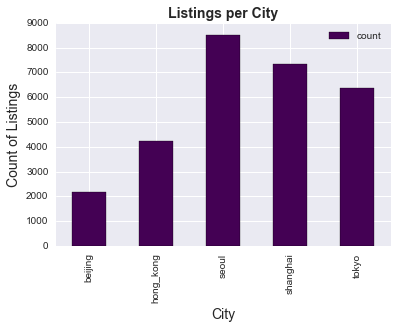

In [399]:
DataFrame(statistics['room_id']['count']).plot(kind = 'bar', cmap='viridis')

plt.xlabel('City', fontsize=14)
plt.ylabel('Count of Listings', fontsize=14)
plt.title('Listings per City', fontsize=14, fontweight='bold')

The listings per city have a wide distribution, varying from ~2000 to ~8000 in developing Asian countries.

- Seoul has the most individual room listings followed by Shanghai and Tokyo.

- Hong Kong and Beijing have less than half the listings compared to the other three cities.

In [418]:
price_df = DataFrame(statistics['price']['mean'].order())
price_df

/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


,mean
location,
shanghai,82.862548
tokyo,86.644169
beijing,87.729379
seoul,98.302735
hong_kong,105.040518


In [420]:
print 'Average Cost of a Room in Emerging Asian Countries = ', price_df['mean'].mean()

Average Cost of a Room in Emerging Asian Countries =  92.1158697793


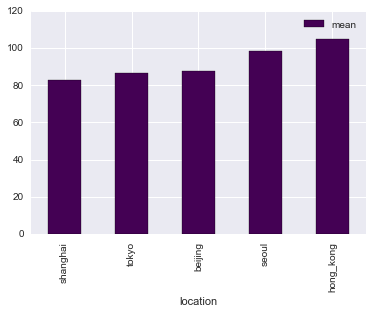

In [412]:
price_df.plot(kind = 'bar', cmap='viridis')

**The average cost of a room in an Emerging Asian Country is ~$92**

- Hong Kong has the highest average price while Shanghai has the lowest. 

- The range of the means is only 23 dollars, which compared to the average price of 92 dollars, can be significant. 

/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


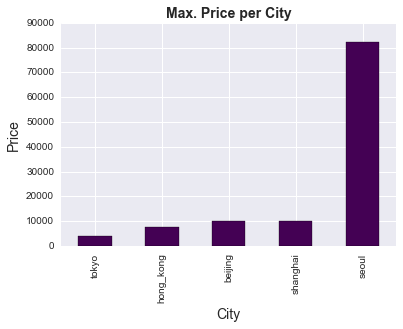

In [413]:
statistics['price']['max'].order().plot(kind ='bar', cmap='viridis')
plt.xlabel('City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Max. Price per City', fontsize=14, fontweight='bold')

**Seoul has the highest max price. The others are relatively the same. **

/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


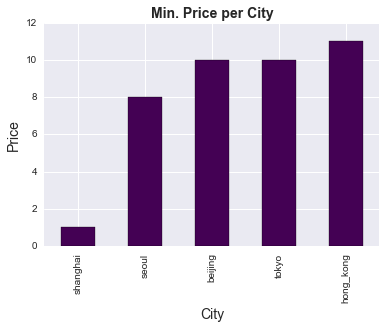

In [421]:
statistics['price']['min'].order().plot(kind ='bar', cmap='viridis')
plt.xlabel('City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Min. Price per City', fontsize=14, fontweight='bold')

**Shanghai has the lowest minimum price. Others are relatively similar**

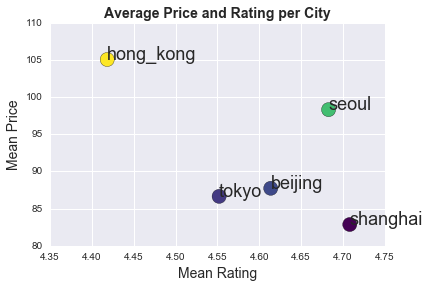

In [389]:
x = statistics['overall_satisfaction']['mean']
y = statistics['price']['mean']
n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap='viridis', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 18)

plt.xlabel('Mean Rating', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.title('Average Price and Rating per City', fontsize=14, fontweight='bold')

The ***'best rating value'*** will be those cities that have a high mean rating and low mean price. Meaning that that city gets you, on average, a better listing for a lower average price.

These cities will fall in the lower right hand corner of the scatterplot.

- Shanghai has the best rating value by far, on average you get a highly rated room for a low price. 

- In Seoul on the other hand, on average, you can get a highly rated room but it will cost you more.

- **Hong Kong is the outlier here**; you pay a very high price for a relatively low rating compared to the other Asian countries. 

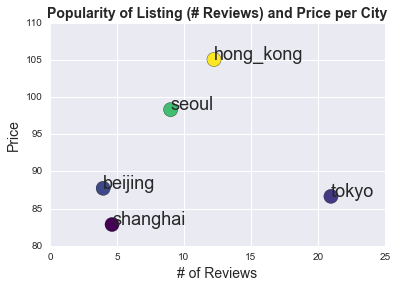

In [400]:
x = statistics['reviews']['mean']
y = statistics['price']['mean']

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap='viridis', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 18)

plt.xlabel('# of Reviews', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Popularity of Listing (# Reviews) and Price per City', fontsize=14, fontweight='bold')

Using the number of reviews as an indicator for the popularity of the listing, we can derive a **'best popularity value'** for cities where those with a high 'value' are more popular for a lower average price.

These cities will fall in the lower right hand corner of the scatterplot.

**The cities seem to fall in three groups:**

- Tokyo has the most 'popular' listings for a low price and the best popularity value.

- Hong Kong and Seoul are relatively popular but for a very high price. This makes sense as they have the highest average cost per listing. 

- Beijing and Shanghai are the low priced but are not very popular, with very few reviews.


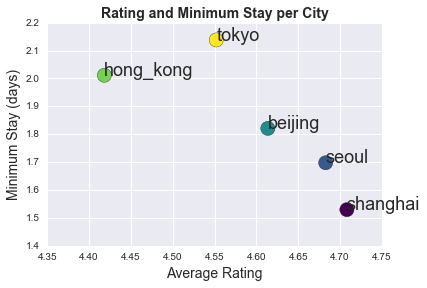

In [394]:
x = statistics['overall_satisfaction']['mean']
y = statistics['minstay']['mean']

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap='viridis', s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 18)

plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Minimum Stay (days)', fontsize=14)
plt.title('Rating and Minimum Stay per City', fontsize=14, fontweight='bold')

This scatterplot demonstrates a trend for the number of minimum days stayed and Average Rating. **As the average rating increases, the mimimum days the guest is requried to stay decreases.** Listings with higher ratings are less worried about the demand for thier listings while those with lower rating ensure a higher income by requiring a higher minimum stay. 

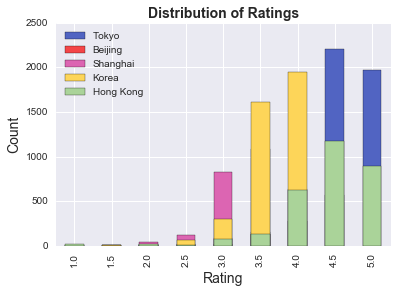

In [343]:
japan.groupby('overall_satisfaction').size().plot(kind = 'bar', color = blue_color , label = 'Tokyo' )
china_b.groupby('overall_satisfaction').size().plot(kind = 'bar', color = red_color, label = 'Beijing')
china_s.groupby('overall_satisfaction').size().plot(kind = 'bar', color = purple_color, label = 'Shanghai')
korea.groupby('overall_satisfaction').size().plot(kind = 'bar', color = yellow_color, label = 'Korea')
hong_kong.groupby('overall_satisfaction').size().plot(kind = 'bar', color = green_color, label = 'Hong Kong')


plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
plt.legend(loc=0)

In [429]:
japan_sat = DataFrame(japan.groupby('overall_satisfaction').size())
japan_sat_total = japan.groupby('overall_satisfaction').size().sum()
japan_sat['percent'] = japan_sat[0] / japan_sat_total
japan_sat

,0,percent
overall_satisfaction,,
1.0,10,0.001961
1.5,2,0.000392
2.0,17,0.003334
2.5,15,0.002942
3.0,87,0.017062
3.5,156,0.030594
4.0,639,0.125319
4.5,2204,0.432242
5.0,1969,0.386154


5. Data Story Graphs Part II
======

*Creating Indexes for Comparing Listing Behavior in Emerging East Asian Countries*
-----

***Popularity Index***

    Function of reviews and rating 
    
    Higher the #, more popular the listing

***Value Index***

        Function of Popularity Index, Size of Listing (#rooms, bathrooms,# accomodates) over Price
        
        Higher # means you get more Value per dollar spent on Listing
        

***<font color='red'>Feedback Here!</font>***
----

In [49]:
beijing['popularity_index'] = beijing['reviews'] * beijing['overall_satisfaction'] / 10
beijing['value_index'] = (beijing['popularity_index'] * (beijing['bedrooms'] + (.5 * beijing['bathrooms'])) * beijing['accommodates']) / beijing['price']

seoul['popularity_index'] = seoul['reviews'] * seoul['overall_satisfaction'] / 10
seoul['value_index'] = (seoul['popularity_index'] * (seoul['bedrooms'] + (.5 * seoul['bathrooms'])) * seoul['accommodates']) / seoul['price']

hong_kong['popularity_index'] = hong_kong['reviews'] * hong_kong['overall_satisfaction'] / 10
hong_kong['value_index'] = (hong_kong['popularity_index'] * (hong_kong['bedrooms'] + (.5 * hong_kong['bathrooms'])) * hong_kong['accommodates']) / hong_kong['price']

tokyo['popularity_index'] = tokyo['reviews'] * tokyo['overall_satisfaction'] / 10
tokyo['value_index'] = (tokyo['popularity_index'] * (tokyo['bedrooms'] + (.5 * tokyo['bathrooms'])) * tokyo['accommodates']) / tokyo['price']

shanghai['popularity_index'] = shanghai['reviews'] * shanghai['overall_satisfaction'] / 10
shanghai['value_index'] = (shanghai['popularity_index'] * (shanghai['bedrooms'] + (.5 * shanghai['bathrooms'])) * shanghai['accommodates']) / shanghai['price']

/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

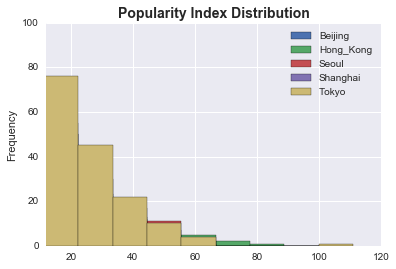

In [346]:
fig = plt.figure(figsize = (10,10), dpi = 100)

dict_popularity_index = {
    'Beijing': beijing['popularity_index'].dropna(),
    'Seoul' : seoul['popularity_index'].dropna(),
    'Hong_Kong' : hong_kong['popularity_index'].dropna(),
    'Tokyo' : tokyo['popularity_index'].dropna(),
    'Shanghai' : shanghai['popularity_index'].dropna()
                 }
df = DataFrame(dict_popularity_index).dropna()

df.plot.hist(bins = 10, xlim = 12, ylim = (0,100))


plt.title('Popularity Index Distribution', fontsize=14, fontweight='bold')
plt.legend(loc=0)


Tokyo has vastly more listings, so it overpowers the graph here

Graph of Popularity Index Distribution without Tokyo:

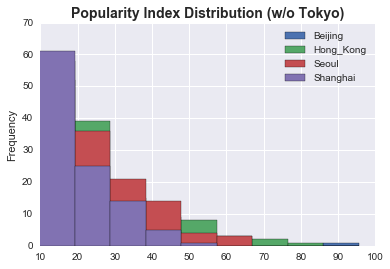

In [347]:
fig = plt.figure(figsize = (10,10), dpi = 100)

dict_popularity_index = {
    'Beijing': beijing['popularity_index'].dropna(),
    'Seoul' : seoul['popularity_index'].dropna(),
    'Hong_Kong' : hong_kong['popularity_index'].dropna(),
    #'Tokyo' : tokyo['popularity_index'].dropna(),
    'Shanghai' : shanghai['popularity_index'].dropna()
                 }
df = DataFrame(dict_popularity_index).dropna()

df.plot.hist(bins = 10, xlim = 10, ylim = (0,70))

plt.title('Popularity Index Distribution (w/o Tokyo)', fontsize=14, fontweight='bold')
plt.legend(loc=0)